# Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

# HALLMARK Gene Sets import

In [ ]:
gene_sets = {}

with open('../Data/HALLMARK_related/h.all.v7.4.symbols.gmt') as f:
    for line in f:
        tmp = line.rstrip('\n').split('\t')
        pw = tmp.pop(0)
        gene_sets[pw] = tmp[1:]

# GSEA1T: the workhorse

In [ ]:
from gsea import Gsea1T 

## Example signature

In [ ]:

import pandas as pd 
gsig = pd.read_table('../Analyses/1_CUMC_LCM/ARNTL2/Hypoxia_ARNTL2_RNASeq/Results/KDHypoxia.rnk', 
                        header=None, index_col=0)
ges = pd.Series(data=gsig.values.ravel(), index=gsig.index, name='hypoxia')

In [ ]:
gsobj = Gsea1T(ges, gene_sets['HALLMARK_INTERFERON_ALPHA_RESPONSE'])
# gsobj = Gsea1T(ges, gene_sets['HALLMARK_KRAS_SIGNALING_UP'])

In [ ]:
fig = gsobj.plot(figsize=(3, 3), ges_type='Wald stat')
fig.savefig('Test-Gsea1T.pdf')
# pkw = {'color':'C3'}
# fig = gsobj.plot_ledge(figsize=(3, 3), highlight=('LAMP3', 'GBP2'))
# fig.savefig('Test-Gsea1T-Ledge.pdf')

In [ ]:
x, y, z = list(zip(*zip(np.arange(10), np.arange(10), ['OK']*10)))
x

In [ ]:
import matplotlib as mpl
mpl.matplotlib_fname()

# GSEA1TMultSig: show one gene set on multiple signatures

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gsea import Gsea1TMultSigs

## Example dset

In [ ]:
dset = pd.read_csv('/home/carlo/Documents/Analyses/1_CUMC_LCM/ARNTL2/Hypoxia_ARNTL2_RNASeq/Results/KnockdDown_WaldStatSinatures.csv', index_col=0)
dset.columns = dset.columns.str.upper()
dset

In [ ]:
dset = pd.read_table('/home/carlo/Documents/Analyses/1_CUMC_LCM/Sample-Data/Output_results/Log2FC-Matrix-Histopath-Signatures.txt', index_col=0)
dset.columns = dset.columns.str.upper()
dset

## HALLMARK

In [ ]:
gene_sets = {}

with open('../Data/HALLMARK_related/h.all.v7.4.symbols.gmt') as f:
    for line in f:
        tmp = line.rstrip('\n').split('\t')
        pw = tmp.pop(0)
        gene_sets[pw] = tmp[1:]


## Class definition

In [ ]:
gsobj = Gsea1TMultSigs(dset, gene_set=gene_sets.get('HALLMARK_HYPOXIA'))

In [ ]:
fig = gsobj.plot(figsize=(3, 1.5), 
                 norm_kw={'vcenter':0, 'vmin':-10, 'vmax':10}, 
                 add_title='GS: HYPOXIA')

In [ ]:
fig.savefig('Test-Gsea1TMultSigs.pdf')

# GSEA1TMultSet: Multiple gene sets on one signature

## Example signature

In [ ]:

import numpy as np
import pandas as pd
from gsea import Gsea1TMultSets

hypo_sig = pd.read_table('../Analyses/1_CUMC_LCM/ARNTL2/Hypoxia_ARNTL2_RNASeq/Results/KnockdownNormoxia-Signature-Results.tsv')
ges = pd.Series(data=hypo_sig['stat'].values, index=hypo_sig['row'].values)

## HALLMARK gene sets

In [ ]:
gene_sets = {}

with open('../Data/HALLMARK_related/h.all.v7.4.symbols.gmt') as f:
    for line in f:
        tmp = line.rstrip('\n').split('\t')
        pw = tmp.pop(0)
        gene_sets[pw] = tmp[1:]
        
len(gene_sets)

Gsea1TMultSets

In [ ]:
gsobj = Gsea1TMultSets(ges, gene_sets, minsize=5)
gsobj

In [ ]:

fig = gsobj.plot(figsize=(3, 6), 
                 conditions=('CTRL', 'ARNTL2 KD'))
fig.savefig('Test-Gsea1TMultSet.pdf')

In [ ]:
gsobj.stats.to_csv('/home/carlo/Documents/Analyses/1_CUMC_LCM/ARNTL2/Hypoxia_ARNTL2_RNASeq/Results/aREA_HALLMARK_ARNTL2KD_Normoxia.tsv', sep='\t', index=False)

# Gsea2T

In [ ]:
%load_ext autoreload
%autoreload 2


## Example signature

In [ ]:
import numpy as np
import pandas as pd
from gsea import Gsea2T

hypo_sig = pd.read_table('../Analyses/1_CUMC_LCM/ARNTL2/Hypoxia_ARNTL2_RNASeq/Results/KnockdownHypoxia-Signature-Results.tsv')
ges = pd.Series(data=hypo_sig['stat'].values, index=hypo_sig['row'].values)

In [ ]:
gsobj = Gsea2T(ges,  gene_set_1=gene_sets['HALLMARK_INTERFERON_ALPHA_RESPONSE'], gene_set_2=gene_sets['HALLMARK_HYPOXIA'])

In [ ]:
gsobj

In [ ]:
fig = gsobj.plot(conditions=('ARNTL2 KD', 'CTRL'), ges_type='Wald stat')
fig.savefig('Gsea2T-Test.pdf')

In [ ]:
fig = gsobj.plot_ledge(lbl_kw_1={'fontsize':5}, lbl_kw_2={"fontsize":5}, ledge_trim_2=25)
fig.savefig('Gsea2T-Ledge-Test.pdf')

# GseaReg

In [ ]:
dset = pd.read_table('../Analyses/1_CUMC_LCM/Sample-Data/Output_results/Log2FC-Matrix-Histopath-Signatures.txt', index_col=0)
ges = dset.pop('SquamousVsRest').copy()

In [ ]:
ges

In [ ]:
reg = pd.read_csv('../Analyses/1_CUMC_LCM/Salmon_Gencode_hg38/Networks_Salmon/Epi/CUMC-Enet.csv')
reg_dict = {reg:df[['target', 'mor', 'likelihood']] for reg, df in reg.groupby('source', as_index=False)}
reg_dict

In [ ]:
rp_reg = {rp:df for rp, df in reg_dict.items() if rp=='ARNTL2'}
rp_reg

In [ ]:
from gsea import GseaReg

In [ ]:
gsobj = GseaReg(ges, rp_reg)

In [ ]:
from gsea import aREA

In [ ]:
fig = gsobj.plot(conditions=('Squamous', 'Rest'))
fig.savefig('GseaReg-Test.pdf')

In [ ]:
gsobj.ledge_1

In [ ]:
fig = gsobj.plot_ledge(ledge_trim_1=30, ledge_trim_2=30, highlight_set_1=('HCAR2', 'EREG', 'CAV1'))
fig.savefig('GseaReg-Ledge-Test.pdf')

---

# GseaRegMultSig

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gsea import GseaRegTMultSigs

## Example signature

In [ ]:
dset = pd.read_table('../Analyses/1_CUMC_LCM/Sample-Data/Output_results/Log2FC-Matrix-Histopath-Signatures.txt', index_col=0)
dset.head()

## Example regulon

In [ ]:
reg = pd.read_csv('../Analyses/1_CUMC_LCM/Salmon_Gencode_hg38/Networks_Salmon/Epi/CUMC-Enet.csv')
reg_dict = {i:group.reset_index(drop=True) for i, group in reg.groupby('source', as_index=True)}

In [ ]:
rp_reg = {r:df.drop('source', axis=1) for r, df in reg_dict.items() if r=='ARNTL2'}
rp_reg

In [ ]:
gsobj = GseaRegTMultSigs(dset, rp_reg)

In [ ]:
gsobj.stats

In [ ]:
fig = gsobj.plot(figsize=(3, 2))
fig.savefig('GseaRegMultSigs-Test.pdf')

# GseaMultReg

In [3]:
dset = pd.read_table('../Analyses/1_CUMC_LCM/Sample-Data/Output_results/Log2FC-Matrix-Histopath-Signatures.txt', index_col=0)
ges = dset.pop('SquamousVsRest').copy()

In [4]:
reg = pd.read_csv('../Analyses/1_CUMC_LCM/Salmon_Gencode_hg38/Networks_Salmon/Epi/CUMC-Enet.csv')
reg_dict = {reg:df[['target', 'mor', 'likelihood']] for reg, df in reg.groupby('source', as_index=False)}

In [5]:
from gsea import GseaMultReg

In [27]:
gsobj = GseaMultReg(ges, reg_dict)

In [28]:
gsobj

GseaMultReg(GES length: 19165
Regulators provided: 2211
Regulators evaluated: 2211

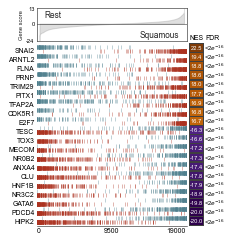

In [52]:
fig = gsobj.plot(conditions=('Rest', 'Squamous'), figsize=(3,4))
fig.savefig('GseaMultReg-Test.pdf')

In [44]:
df = gsobj.stats
top_rp = df.take(df['NES'].abs().nlargest(20).index)['Regulator']
df = df[df['Regulator'].isin(top_rp)]
df.reset_index(inplace=True, drop=True)

In [42]:
targets = gsobj.target_idx.loc[df['Regulator']].values
evt_data = [arr for tup in targets for arr in tup]


In [45]:
len(evt_data)

40

In [26]:
gsobj.plot()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
def _find_hits(self, 
               ges: pd.Series, 
               gene_sets: dict):
        """

        Args:
          ges: pd.Series: 
          gene_sets: dict: 

        Returns: 
        """

        # This will have to be sorted first, which is the case in this Class
    ges = ges.argsort()
        
    return [ges[ges.index.intersection(val)].values for val in gene_sets.values()]
            

In [ ]:
gsobj = GseaMultReg(ges, reg_dict)

In [ ]:
fig, ax = plt.subplots()
ax.eventplot(tt[:20], linelengths=0.33, linewidths=0.7, lineoffsets=offs,  colors=cls);

ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], va='top')
fig.savefig('GseaRegMultSig-Test.pdf')

In [ ]:
from gsea import GseaRegTMultSigs


In [ ]:
gsobj = GseaRegTMultSigs(dset, rp_reg)

In [ ]:
from matplotlib.gridspec import GridSpec
from matplotlib.cm import coolwarm, ScalarMappable
cmap = coolwarm
cols = np.tile(['#FB5607', '#828C51'], len(regs))


fig = plt.figure(tight_layout=True)
gs = GridSpec(nrows=2, ncols=2, hspace=0, height_ratios=[1,10], width_ratios=[1,10])

ax1 = plt.subplot(gs[0,1])
fig.colorbar(ScalarMappable(cmap=cmap), orientation='horizontal', ticks=[],cax=ax1)
ax1.annotate('Down', (0, 0.5), xycoords='axes fraction', color='w', ha='left', va='center')
ax1.annotate('Up', (1, 0.5), xycoords='axes fraction', color='w', ha='right', va='center')
ax1.margins(y=0)

ax2 = plt.subplot(gs[1,1])
ax2.eventplot(data, linelengths=1/3, lineoffsets=ys_info['ypos'], alpha=0.5, color=cols)
ax2.margins(x=0.02)
ax2.set_yticks(ys_info['labelpos'])
ax2.set_yticklabels(regs)
ax2.tick_params(length=0, pad=0.8, labelsize=8)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_ylim([-.25, len(regs)-1])

# for i, stats in enumerate([(-1.9611294, 0.00023004587), (-1.237399, 0.15832263)]):
#     nes, fdr = stats
#     ax2.text(0, i-.26, 'NES: {:.2f}, FDR: {:.2e}'.format(nes, fdr), va='top')

ax3 = plt.subplot(gs[1,0])
ax3.pcolormesh(stats.values[:,np.newaxis], cmap='viridis')
ax3.axis('off')
for i, nes in enumerate(stats.values):
    ax3.text(x=0.5, y=i+0.5, s="{:.2f}".format(nes), ha='center', c='w', fontsize=8)
ax3.set_title('NES')
#fig.savefig('test3.pdf', transparent=True, bbox_inches='tight', dpi=150)


# Testing out color maps

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm

In [ ]:
X = np.concatenate((np.random.normal(size=50), np.random.normal(loc=10, size=20))).reshape(-1,1)
X.sort(axis=0)

In [ ]:
arr = [-18.3665957,  -12.98670207,  -8.00381,     -2.41254807,  -2.22093726,
  -2.05555296,  -1.27877686,  -0.81932312,  -0.46068903,  -0.13497194,
   0.17512368,   0.59595715,   0.71394319,   0.7298588,    1.03703378,
   1.44717056,   1.61256244,   2.02129354,   2.08393161,   2.1475689,
   2.15782993,   2.21334173,   2.58706101,   2.85116052,   2.92276776,
   3.15657542,   3.41710695,   3.95671378,   3.99037965,   4.14255156,
   4.53036022,   4.65583896,   4.74520575,   5.15479047,   5.16568711,
   5.28537102,  5.30237791,   5.9894994,    6.29368152,   7.56069596]

## Prepare a 2-tailed plot

In [ ]:
xpos1 = np.linspace(gsobj1.ledge_xlims[0], gsobj1.ledge_xlims[1], len(gsobj1.ledge))
xpos2 = np.linspace(gsobj2.ledge_xlims[0], gsobj2.ledge_xlims[1], len(gsobj2.ledge))

In [ ]:
genes1 = gsobj1.ledge['gene'].values
genes2 = gsobj2.ledge['gene'].values

In [ ]:
# yjitter
ys1= 1/3 + (np.random.normal(0, 0.1, len(gsobj1.ledge)))
ys2= 1/3 + (np.random.normal(0, 0.1, len(gsobj2.ledge)))
# xlims for zoom axis 
xdown1, xdown2 = gsobj1.es_idx, gsobj1.ns
xup1, xup2 = 0, gsobj2.es_idx+50

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
# from matplotlib import ticker

fig = plt.figure(figsize=(6, 6))
gs = GridSpec(3, 1, height_ratios=[1, 4, 1], hspace=0.1)

ax1 = fig.add_subplot(gs[0])
ax1.set_xlim(xup1, xup2)
ax1.axis('off')
texts1 = [ax1.text(x, y, s, fontsize='xx-small', rotation=90) for x, y, s in zip(xpos2, ys2, genes2)]

ax2 = fig.add_subplot(gs[1])
ax2.plot(gsobj1.rs, c='C0')
ax2.plot(gsobj2.rs, c='C1')
ax2.axhline(y=0, linestyle='-', c='.5', lw=0.8)
ax2.vlines(gsobj1.es_idx, 0, gsobj1.rs[gsobj1.es_idx], color='C0', linestyle='--', lw=.8)
ax2.vlines(gsobj2.es_idx, 0, gsobj2.rs[gsobj2.es_idx], color='C1', linestyle='--', lw=.8)
ax2.set_xticks([])

ax3 = fig.add_subplot(gs[2])
ax3.set_xlim(xdown1, xdown2)
ax3.axis('off')
texts2 = [ax3.text(x, y, s, fontsize='xx-small', rotation=90) for x, y, s in zip(xpos1, ys1, genes1)]

zoom_effect(ax3, ax2, upper=False, patch_kws={'color':'C0', 'alpha':0.1});
zoom_effect(ax1, ax2, patch_kws={'color':'C1', 'alpha':0.1})


fig.savefig('Test-LedgePlot-2T.pdf')